<h2>Project on Austo Motor Company</h2>

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [253]:
import warnings
warnings.filterwarnings("ignore")

In [254]:
df= pd.read_csv("Austo Motor Company.csv")

In [255]:
df.head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [256]:
df.info()  

# we can information about the type of data each column has in it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


<h2> Preliminary analysis of Data</h2>

In [257]:
df.shape 

# total rows: 1581 and columns : 14

(1581, 14)

In [258]:
df.columns

# here are the 14 columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [259]:
df.isnull().sum()  

# checking null values 

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [260]:
df.Gender.unique() 

# Checking unique values in Geneder Column

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [261]:
df.Gender.value_counts()

# Counting no. of unique values in Gender Column. # Male are more than Female

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [262]:
genderdublicate={'Femal':'Female','Femle':'Female'}
df.Gender=df.Gender.replace(genderdublicate)

# fixing incorrect values of Female
# df.Gender=df.Gender.replace(['Femal','Femle'],['Female','Female'])

**Now we are filling Males in null values with Highest Frequncy of People.
As we know males are more than females**

In [263]:
df.Gender=df.Gender.fillna("Male")   #filled Males records in Null values.

In [264]:
df.isnull().sum()  # partner_salary has null values lets fix this now

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [265]:
df.head(5)  # top 5 rows we see that 



,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


**We are seeing a pattern here that Salary plus Partner Salary is equal to Total_Salary**

In [266]:
print(99300+70700.0) # here we check only 2 rows
print(79700+60200.0)

170000.0
139900.0


In [267]:
#Here I checked if its true that Salary plus Partner Salary is equal to Total_Salary. 
# And YES, Its True 1475 rows are true when adding each column of Partner Salary with Salary column.
# False rows are 106 and same as null records which are 106 rows. (Condition Matched)

(df.Partner_salary+df.Salary==df.Total_salary).value_counts()  

True     1475
False     106
Name: count, dtype: int64

**Salary plus Partner Salary is Linked and when we add both we get Total Salary.
Also we can now use this conclusion to fill null values in partner salary with Actual values**


**now we know that to get Partner Salary we need to Minus Total Salary with Salary**

In [268]:
df.Partner_salary=df.apply(lambda row: row["Total_salary"]-row["Salary"] if np.isnan(row["Partner_salary"]) else row["Partner_salary"], axis=1)

In [269]:
df.isnull().sum() # checking null values

# now the dataset is fully cleaned.

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [270]:
df.head(5)  # checking top 5 rows


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


<H2>E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”</H2>
<h3>We will check whether steve is right about it?</h3>

In [271]:
df.groupby(["Gender","Make"])["Make"].count() 

# here we get an insight that Female Purchases More SUV than Males. BUT We know that Males are More than Females

Gender  Make     
Female  Hatchback     15
        SUV          173
        Sedan        141
Male    Hatchback    567
        SUV          124
        Sedan        561
Name: Make, dtype: int64

In [272]:
df.groupby(["Gender"])["Gender"].count()

Gender
Female     329
Male      1252
Name: Gender, dtype: int64

In [273]:
MaleD=df[["Gender","Make"]].where(df.Gender=="Male").dropna()
FemaleD=df[["Gender","Make"]].where(df.Gender=="Female").dropna()

In [274]:
MaleD

,Gender,Make
0,Male,SUV
4,Male,SUV
7,Male,SUV
8,Male,SUV
9,Male,SUV
...,...,...
1576,Male,Hatchback
1577,Male,Hatchback
1578,Male,Hatchback
1579,Male,Hatchback


In [275]:
FemaleD

,Gender,Make
1,Female,SUV
2,Female,SUV
3,Female,SUV
5,Female,SUV
6,Female,SUV
...,...,...
1350,Female,Hatchback
1389,Female,Hatchback
1503,Female,Hatchback
1518,Female,Hatchback


In [276]:
MSam1=MaleD.sample(329)
MSam2=MaleD.sample(329)
MSam3=MaleD.sample(329)

In [277]:
MSam1=MSam1.groupby(["Make"]).count()

# Sample 1 Males Data concludes that Hatchback are popular choice for Males

In [278]:
MSam1

,Gender
Make,
Hatchback,158
SUV,25
Sedan,146


In [279]:
MSam2=MSam2.groupby(["Make"]).count()

# Sample 2 Males Data concludes that Hatchback popular choice for Males

In [280]:
MSam2

,Gender
Make,
Hatchback,145
SUV,33
Sedan,151


In [281]:
MSam2.iloc[1][0]

33

In [282]:
MSam3=MSam3.groupby("Make").count()

# Sample 3 Males Data concludes that Hatchback popular choice for Males

In [283]:
MSam3

,Gender
Make,
Hatchback,143
SUV,25
Sedan,161


In [284]:
FSam=FemaleD.groupby(["Make"]).count().rename(columns={"Gender":"Female Data"})

# In Female Data we see that SUV are popular choice for Females

In [285]:
FSam

,Female Data
Make,
Hatchback,15
SUV,173
Sedan,141


In [286]:
SuvMales=[MSam1.iloc[1][0],MSam2.iloc[1][0],MSam3.iloc[1][0]]

In [287]:
SuvMales

[25, 33, 25]

In [288]:
SuvFemales=[FSam.iloc[1][0],FSam.iloc[1][0],FSam.iloc[1][0]]

In [289]:
SuvFemales

[173, 173, 173]

In [290]:
SuvDataset=pd.DataFrame({"Male":SuvMales,"Female":SuvFemales},index=["SUV_Sample1","SUV_Sample2","SUV_Sample3"])

In [291]:
SuvDataset

,Male,Female
SUV_Sample1,25,173
SUV_Sample2,33,173
SUV_Sample3,25,173


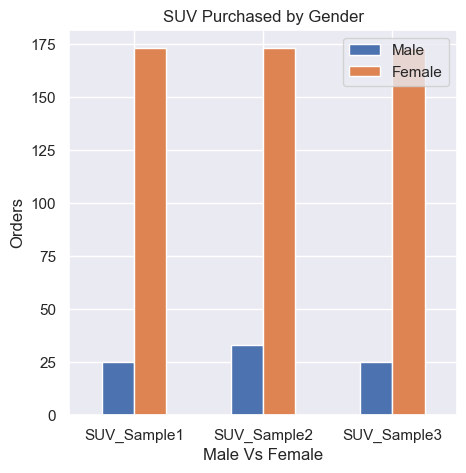

In [292]:
sns.set(rc={'figure.figsize':(5,5)})
SuvDataset.plot.bar(rot=False)
plt.title("SUV Purchased by Gender")
plt.ylabel("Orders")
plt.xlabel("Male Vs Female")
plt.show()

# Female Purchase More SUV than Males.

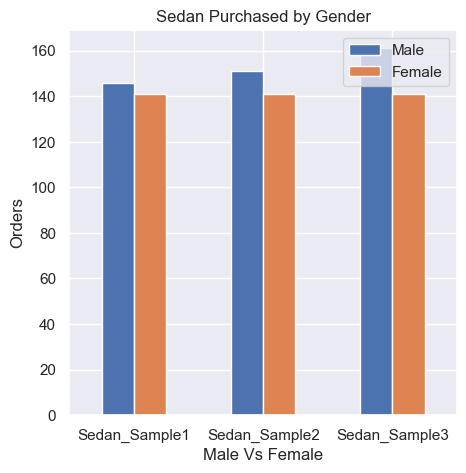

In [293]:
SedanMales=[MSam1.iloc[2][0],MSam2.iloc[2][0],MSam3.iloc[2][0]]
SedanFemales=[FSam.iloc[2][0],FSam.iloc[2][0],FSam.iloc[2][0]]

SedanDataset=pd.DataFrame({"Male":SedanMales,"Female":SedanFemales},index=["Sedan_Sample1","Sedan_Sample2","Sedan_Sample3"])


sns.set(rc={'figure.figsize':(5,5)})
SedanDataset.plot.bar(rot=False)
plt.title("Sedan Purchased by Gender")
plt.ylabel("Orders")
plt.xlabel("Male Vs Female")
plt.show()

# Here we can see not much difference because both male and females equally purchasing Sedan

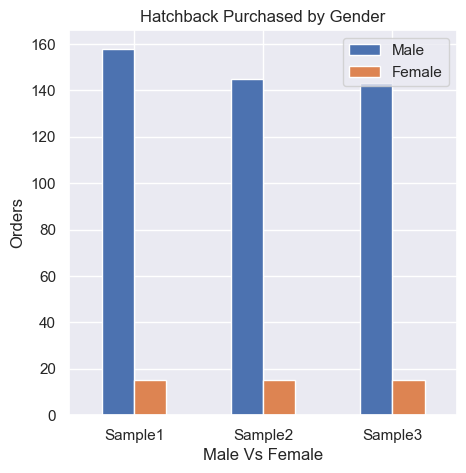

In [294]:
HatchbackMales=[MSam1.iloc[0][0],MSam2.iloc[0][0],MSam3.iloc[0][0]]
HatchbackFemales=[FSam.iloc[0][0],FSam.iloc[0][0],FSam.iloc[0][0]]

HatchbackDataset=pd.DataFrame({"Male":HatchbackMales,"Female":HatchbackFemales},index=["Sample1","Sample2","Sample3"])


sns.set(rc={'figure.figsize':(5,5)})
HatchbackDataset.plot.bar(rot=False)
plt.title("Hatchback Purchased by Gender")
plt.ylabel("Orders")
plt.xlabel("Male Vs Female")
plt.show()

# Here we can see Males are puchasing more Hatchback's than Females

<h3>Hatchback is MOST Popular choice for Males, 
                           
2nd Most popular is Sedan which is liked by both Male and Females equally.

Conlcusion: So Steve Is wrong about the Anaylsis - Suv is Popular Among Females by Large Margin than Males.</H3>



<h2>E2) Ned Stark believes that a salaried person is more likely to buy a Sedan</h2>

<h3> We will check the argument of Ned Starks Now</h3>

In [295]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [296]:
df.Make.unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

In [297]:
df.Profession.unique()

array(['Business', 'Salaried'], dtype=object)

In [298]:
df.groupby(["Profession","Make"])["Make"].count()

Profession  Make     
Business    Hatchback    290
            SUV           89
            Sedan        306
Salaried    Hatchback    292
            SUV          208
            Sedan        396
Name: Make, dtype: int64

In [299]:
df2=df.loc[:,["Profession","Make"]]

In [300]:
bs=df2.where(df['Profession']=='Business').dropna()
sl=df2.where(df['Profession']=='Salaried').dropna()


In [301]:
bs

,Profession,Make
0,Business,SUV
14,Business,SUV
16,Business,SUV
18,Business,SUV
22,Business,SUV
...,...,...
1572,Business,Hatchback
1573,Business,Hatchback
1577,Business,Hatchback
1578,Business,Hatchback


In [302]:
sl

,Profession,Make
1,Salaried,SUV
2,Salaried,SUV
3,Salaried,SUV
4,Salaried,SUV
5,Salaried,SUV
...,...,...
1569,Salaried,Hatchback
1574,Salaried,Sedan
1575,Salaried,Hatchback
1576,Salaried,Hatchback


In [303]:
bs1=bs.groupby("Make").count()

In [304]:
bs1

,Profession
Make,
Hatchback,290
SUV,89
Sedan,306


In [305]:
sl1=sl.groupby("Make").count()

In [306]:
sl1

,Profession
Make,
Hatchback,292
SUV,208
Sedan,396


In [307]:
bsslist=[bs1.iloc[0][0],bs1.iloc[1][0],bs1.iloc[2][0]]
sslist=[sl1.iloc[0][0],sl1.iloc[1][0],sl1.iloc[2][0]]

In [308]:
bsslist

[290, 89, 306]

In [309]:
sslist

[292, 208, 396]

In [310]:
slbs=pd.DataFrame({"Salaried":sslist,"Business":bsslist},index=["Hatchback","SUV","Sedan"])

In [311]:
slbs

,Salaried,Business
Hatchback,292,290
SUV,208,89
Sedan,396,306


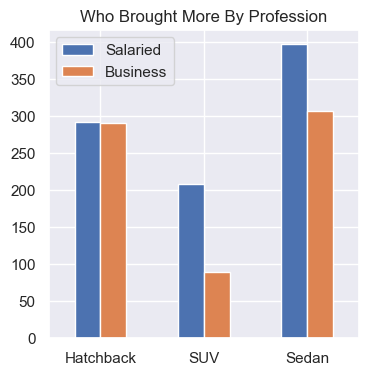

In [312]:
sns.set(rc={'figure.figsize':(4,4)})
slbs.plot.bar(rot=False)
plt.title("Who Brought More By Profession")
plt.show()

<h3>from the above graph.<br>
Ned Stark is right about salaried person more likly to buy Sedan than business person.<br><br>
Also Hatchback is favorite for both Profession<br>
Also Salaried Person are more likely to buy SUV than a Business person.</h3>


<h2>E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier
target for a SUV sale over a Sedan Sale.</h2>

In [313]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [314]:
newdf=df.loc[:,["Gender","Profession","Make"]]

In [315]:
newdf

,Gender,Profession,Make
0,Male,Business,SUV
1,Female,Salaried,SUV
2,Female,Salaried,SUV
3,Female,Salaried,SUV
4,Male,Salaried,SUV
...,...,...,...
1576,Male,Salaried,Hatchback
1577,Male,Business,Hatchback
1578,Male,Business,Hatchback
1579,Male,Business,Hatchback


In [316]:
newdf.groupby(["Gender","Profession","Make"])["Make"].count()

Gender  Profession  Make     
Female  Business    SUV           55
                    Sedan         50
        Salaried    Hatchback     15
                    SUV          118
                    Sedan         91
Male    Business    Hatchback    290
                    SUV           34
                    Sedan        256
        Salaried    Hatchback    277
                    SUV           90
                    Sedan        305
Name: Make, dtype: int64

In [317]:
msl=newdf.where((newdf['Gender']=='Male') & (newdf['Profession']=='Salaried')).dropna()
mbs=newdf.where((newdf['Gender']=='Male') & (newdf['Profession']=='Business')).dropna()

In [318]:
smll=msl.groupby('Make')['Make'].count()
mbsl=mbs.groupby('Make')['Make'].count()

In [319]:
smll

Make
Hatchback    277
SUV           90
Sedan        305
Name: Make, dtype: int64

In [320]:
mbsl

Make
Hatchback    290
SUV           34
Sedan        256
Name: Make, dtype: int64

In [321]:
msllist=[smll.iloc[1],smll.iloc[2]]
mbsllist=[mbsl.iloc[1],mbsl.iloc[2]]

In [322]:
msllist

[90, 305]

In [323]:
mbsllist

[34, 256]

In [324]:
newmbs=pd.DataFrame({"Male Salaried":msllist,"Male Business":mbsllist},index=["SUV","Sedan"])

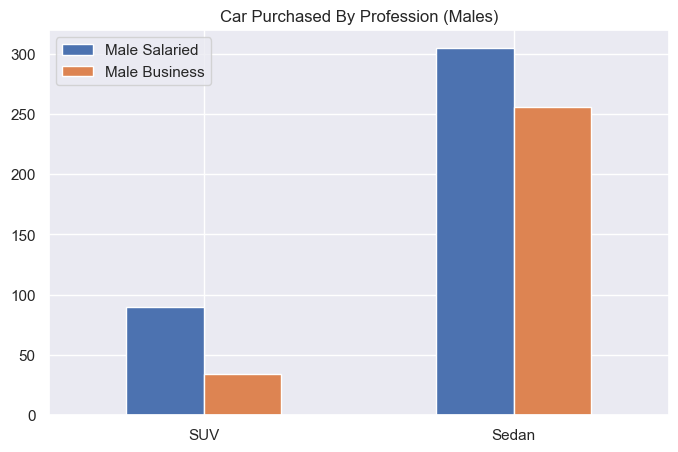

In [325]:
sns.set(rc={'figure.figsize':(8,5)})
newmbs.plot.bar(rot=0)
plt.title("Car Purchased By Profession (Males)")
plt.show()

In [326]:
smll

Make
Hatchback    277
SUV           90
Sedan        305
Name: Make, dtype: int64

In [327]:
mbsl

Make
Hatchback    290
SUV           34
Sedan        256
Name: Make, dtype: int64

<h3> 
from the above graph and with my analysis: <br>Sheldon Cooper is incorrect<br>
because in this case Salaried males are going to purchased both SUV and Sedan and not just one SUV. <br>
    
Lastly , Both professions equally like to purchase hatchback.
    
</h3>

<h2>Amount spent on purchasing automobiles</h2>

<h3>Gender</h3>

<h3>Personal_loan</h3>

In [328]:
df

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,0.0,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,0.0,32200,24000,Hatchback


In [329]:
ploan=df.loc[:,["Personal_loan","Make"]]

In [330]:
ploan

,Personal_loan,Make
0,No,SUV
1,Yes,SUV
2,No,SUV
3,Yes,SUV
4,No,SUV
...,...,...
1576,No,Hatchback
1577,No,Hatchback
1578,No,Hatchback
1579,Yes,Hatchback


In [331]:
ploanY=ploan.where(ploan["Personal_loan"]=="Yes").dropna()
ploanN=ploan.where(ploan["Personal_loan"]=="No").dropna()

In [332]:
ploanY

,Personal_loan,Make
1,Yes,SUV
3,Yes,SUV
6,Yes,SUV
10,Yes,SUV
12,Yes,SUV
...,...,...
1572,Yes,Hatchback
1573,Yes,Hatchback
1574,Yes,Sedan
1575,Yes,Hatchback


In [333]:
ploanN

,Personal_loan,Make
0,No,SUV
2,No,SUV
4,No,SUV
5,No,SUV
7,No,SUV
...,...,...
1571,No,Hatchback
1576,No,Hatchback
1577,No,Hatchback
1578,No,Hatchback


In [334]:
ploanNN=ploanN.groupby("Make").count()
ploanYY=ploanY.groupby("Make").count()

In [335]:
ploanNN

,Personal_loan
Make,
Hatchback,291
SUV,181
Sedan,317


In [336]:
ploanYY

,Personal_loan
Make,
Hatchback,291
SUV,116
Sedan,385


In [337]:
ploanYY.iloc[2][0]

385

In [338]:
ploanYlist=[ploanYY.iloc[0][0],ploanYY.iloc[1][0],ploanYY.iloc[2][0]]
ploanNlist=[ploanNN.iloc[0][0],ploanNN.iloc[1][0],ploanNN.iloc[2][0]]

In [339]:
ploanYlist

[291, 116, 385]

In [340]:
ploanNlist

[291, 181, 317]

In [341]:
loanDf=pd.DataFrame({"Taken":ploanYlist,"Not Taken":ploanNlist},index=["Hatchback","SUV","Sedan"])

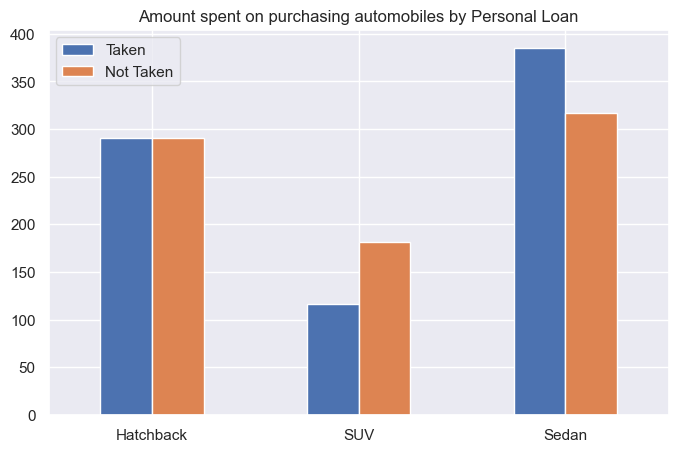

In [342]:
loanDf.plot.bar(rot=0)
plt.title("Amount spent on purchasing automobiles by Personal Loan")
plt.show()

<h3>from the chart above<br>
we can see Sedan is likely to be pucrhased by people who have taken personal loan.<br>
Hatchback is choice for every one who has taken loan or not.<br>
Also SUV is purchased by people who already earning big or have money surplus <br>
because by analysis<br>

i got to see that no personal loan needed to purchased SUV(either these people are rich or have big chunk of money)</h3>

<h2>QUE:If having a working partner leads to the purchase of a higher-priced car?</h2>

In [346]:
df

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,0.0,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,0.0,32200,24000,Hatchback


In [348]:
df.groupby(['Partner_working','Make'])['Make'].count()

Partner_working  Make     
No               Hatchback    281
                 SUV          144
                 Sedan        288
Yes              Hatchback    301
                 SUV          153
                 Sedan        414
Name: Make, dtype: int64

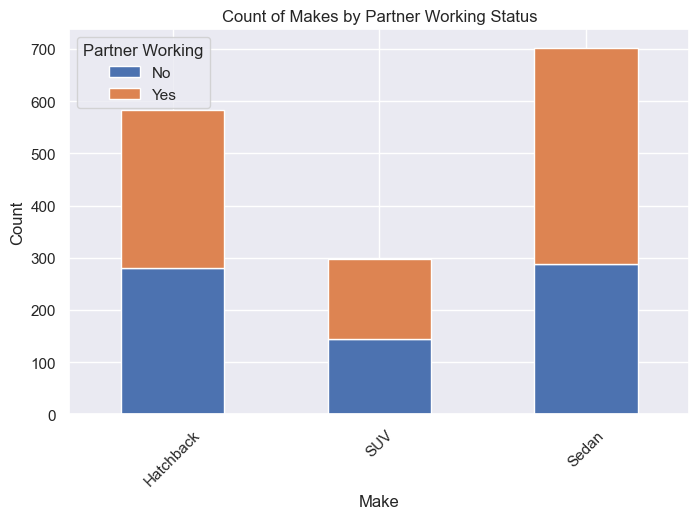

In [350]:
grouped = df.groupby(['Partner_working','Make'])['Make'].count().reset_index(name='Count')

# Pivot the DataFrame for plotting
pivot_df = grouped.pivot(index='Make', columns='Partner_working', values='Count')

# Plotting
pivot_df.plot(kind='bar', stacked=True)
plt.title('Count of Makes by Partner Working Status')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Partner Working')
plt.show()

# from the below plot, we can understand that having a working partner makes it easy to purchase a high prized car such as sedan, hatchback.

<h2>Conclusion:</h2>
<h3>Females show a preference for SUVs over males. There's a balanced trend in Sedan purchases between genders, while males tend to buy more Hatchbacks. Salaried individuals lean towards Sedans, while both professions(business and Salaried) equally favor Hatchbacks. Sedans are often chosen by those with personal loans, while SUVs appeal to those with surplus funds. Having a working partner facilitates the purchase of high-priced cars like Sedans and Hatchbacks.</h3>